# Tone Notebook

In [1]:
import warnings
import math
from cmath import log
from random import uniform
from curses import window
from encodings import normalize_encoding
from locale import normalize
from itertools import zip_longest

import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage.filters import uniform_filter1d

import pitch_process as pp
import utils

warnings.filterwarnings("ignore", message="PySoundFile failed. Trying audioread instead.")

## Tone 1 Analysis

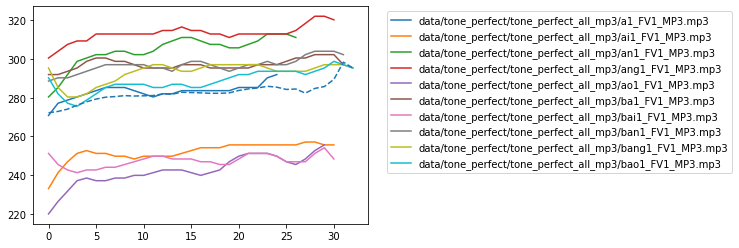

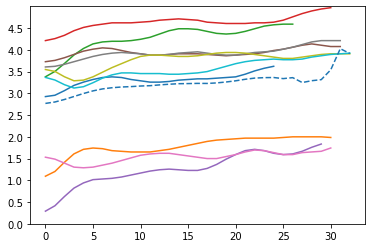

In [5]:
# load audio files for tone 1

spkr1_t1_files = utils.get_tone_perfect_audiofiles(tone=1, spkr=1, sex='F')
tone1 = []

counter = 0
for file in spkr1_t1_files:
    y, sr = librosa.load(file)
    f0, voiced_flag, voiced_probs = librosa.pyin(y, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'))
    voiced = pp.voice_activity(f0, voiced_flag)
    tone1.append(voiced)
    plt.plot(voiced, label=file)
    
    counter += 1
    if counter == 10:
        break
        
# https://stackoverflow.com/questions/52671807/python-multiple-lists-of-different-lengths-averages-and-standard-deviations
mean_tone1 = np.nanmean(np.array(list(zip_longest(*tone1)),dtype=float),axis=1)

plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.plot(mean_tone1, '--', label='mean')
plt.savefig('spkrF1_t1.png')
plt.show()  

plt.figure(1)
ax = plt.gca()
ax.set_ylim([0, 5])
plt.yticks(np.arange(0, 5, 0.5))

max_f0, min_f0 = pp.max_min_f0(tone1)
tone1_normalized = []
for item in tone1:
    smoothed_f0 = pp.moving_average(item)
    normalized_values = pp.normalize_pitch(smoothed_f0, max_f0, min_f0)
    tone1_normalized.append(normalized_values)
    plt.plot(normalized_values)

mean_tone1_normalized = np.nanmean(np.array(list(zip_longest(*tone1_normalized)),dtype=float),axis=1)
plt.plot(mean_tone1_normalized, '--')
plt.savefig('spkrF1_t1_normalized.png')
plt.show()



In [ ]:

# a = np.array([[1, 2], [3, 4, 5]], dtype=object)
# lens = np.array(list(map(len,a)))
# print(lens)
    